In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\SC_DS_Projects\Delivery Duration Prediction, DoorDash\data\historical_data.csv"
df = pd.read_csv(path)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [4]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [5]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [6]:
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
df['delivery_duration_2'] = df['delivery_duration'].dropna().apply(
    lambda x: f"{int(x // 3600):02}:{int((x % 3600) // 60):02}:{int(x % 60):02}"
)

df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,delivery_duration_2
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,00:39:50


In [7]:
len(df[df['total_busy_dashers'] > df['total_onshift_dashers']])

40394

In [8]:
df['total_busy_dashers_2'] = df.apply(lambda row: row['total_onshift_dashers'] if row['total_busy_dashers'] > row['total_onshift_dashers'] else row['total_busy_dashers'], axis=1)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,delivery_duration_2,total_busy_dashers_2
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,01:02:59,14.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,01:07:04,1.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,00:29:41,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,00:51:15,1.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,00:39:50,6.0


In [9]:
df['busy_dashers_ratio'] = df['total_busy_dashers_2'] / df['total_onshift_dashers']

In [10]:
order_protocol_dummmies = pd.get_dummies(df['order_protocol']).add_prefix('order_protocol_').astype(int)
order_protocol_dummmies.head()


,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [11]:
market_id_dummmies = pd.get_dummies(df['market_id']).add_prefix('market_id_').astype(int)
market_id_dummmies.head()


,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [12]:
store_id_unique = df['store_id'].unique().tolist()
store_id_and_category = {store_id: df[df['store_id']==store_id]['store_primary_category'].mode() for store_id in store_id_unique}


def fill(store_id):
    """Return primary store category from the dictionary"""

    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan
    
df['nan_free_store_primary_category'] = df['store_id'].apply(fill)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,delivery_duration_2,total_busy_dashers_2,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,...,33.0,14.0,21.0,446,861.0,3779.0,01:02:59,14.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,...,1.0,2.0,2.0,446,690.0,4024.0,01:07:04,1.0,1.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,...,1.0,0.0,0.0,446,690.0,1781.0,00:29:41,0.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,...,1.0,1.0,2.0,446,289.0,3075.0,00:51:15,1.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,...,6.0,6.0,9.0,446,650.0,2390.0,00:39:50,6.0,1.000000,indian


In [13]:
store_primary_category_dummies = pd.get_dummies(df['nan_free_store_primary_category']).add_prefix('category_').astype(int)
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_df = df.drop(columns=['created_at', 'actual_delivery_time', 'market_id', 'store_id', 'store_primary_category', 'nan_free_store_primary_category', 'delivery_duration_2', 'total_busy_dashers'])
train_df = pd.concat([train_df, order_protocol_dummmies, market_id_dummmies, store_primary_category_dummies], axis=1).astype('float32')
train_df.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,3900.0,3.0,1100.0,1600.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
train_df['busy_dashers_ratio'].describe()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.775540e+05
mean             -inf
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max      1.000000e+00
Name: busy_dashers_ratio, dtype: float64

In [16]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.shape

(176166, 100)

#### **PART 2**

(array([ 1333., 46023., 82542., 43615., 15746.,  5199.,  1732.,   621.,
          283.,   135.]),
 array([ 101. , 1090.6, 2080.2, 3069.8, 4059.4, 5049. , 6038.6, 7028.2,
        8017.8, 9007.4, 9997. ]),
 <BarContainer object of 10 artists>)

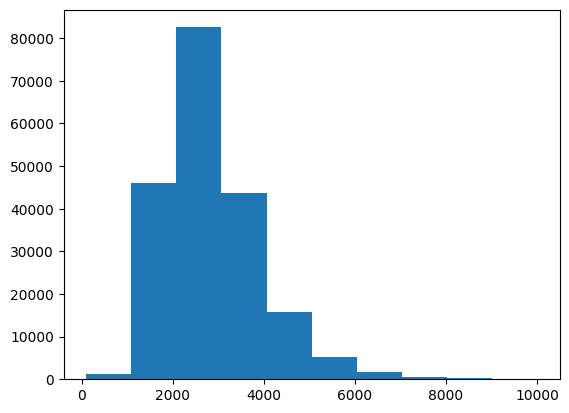

In [17]:
import matplotlib.pyplot as plt
plt.hist(df[df['delivery_duration']<10000]['delivery_duration'])

In [18]:
df_2 = df.groupby('store_id').agg({'delivery_duration':'mean'}).reset_index().sort_values(by='delivery_duration', ascending=False)
df_2['delivery_duration_2'] = df_2['delivery_duration'].apply(
    lambda x: f"{int(x // 3600):02}:{int((x % 3600) // 60):02}:{int(x % 60):02}"
)
df_2

,store_id,delivery_duration,delivery_duration_2
3425,3560,504437.764706,140:07:17
4179,4338,19501.714286,05:25:01
1994,2065,15553.000000,04:19:13
6196,6426,13615.000000,03:46:55
931,974,9630.000000,02:40:30
...,...,...,...
5284,5480,1224.500000,00:20:24
5617,5825,1116.000000,00:18:36
4917,5102,1083.000000,00:18:03
2124,2202,1051.000000,00:17:31


In [19]:
df_3 = df.groupby('total_items').agg({'delivery_duration':'mean'}).reset_index().sort_values(by='delivery_duration', ascending=False)
df_3['delivery_duration_2'] = df_3['delivery_duration'].apply(
    lambda x: f"{int(x // 3600):02}:{int((x % 3600) // 60):02}:{int(x % 60):02}"
)
df_3

,total_items,delivery_duration,delivery_duration_2
42,43,5924.000000,01:38:44
37,38,4621.500000,01:17:01
55,84,4478.000000,01:14:38
35,36,4223.250000,01:10:23
49,51,4197.000000,01:09:57
48,50,4015.500000,01:06:55
44,45,3864.000000,01:04:24
39,40,3757.250000,01:02:37
38,39,3707.333333,01:01:47
26,27,3528.666667,00:58:48


In [20]:
df['day_of_week'] = df['created_at'].dt.day_name()
df_4 = df.groupby('day_of_week').agg({'delivery_duration':'mean'}).reset_index().sort_values(by='delivery_duration', ascending=False)
df_4['delivery_duration_2'] = df_4['delivery_duration'].apply(
    lambda x: f"{int(x // 3600):02}:{int((x % 3600) // 60):02}:{int(x % 60):02}"
)
df_4

,day_of_week,delivery_duration,delivery_duration_2
3,Sunday,3163.244534,00:52:43
1,Monday,3102.781439,00:51:42
2,Saturday,3005.173128,00:50:05
4,Thursday,2826.104624,00:47:06
5,Tuesday,2779.843731,00:46:19
0,Friday,2684.771085,00:44:44
6,Wednesday,2668.265606,00:44:28


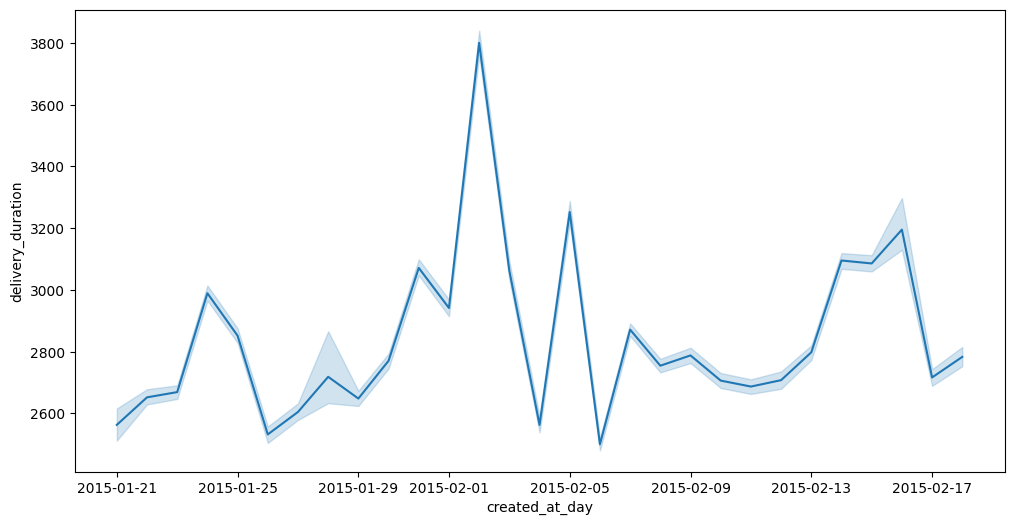

In [21]:
import seaborn as sns

df['created_at_day'] = df['created_at'].dt.date
plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at_day', y='delivery_duration', data=df[df['delivery_duration']<1000000])
plt.show()

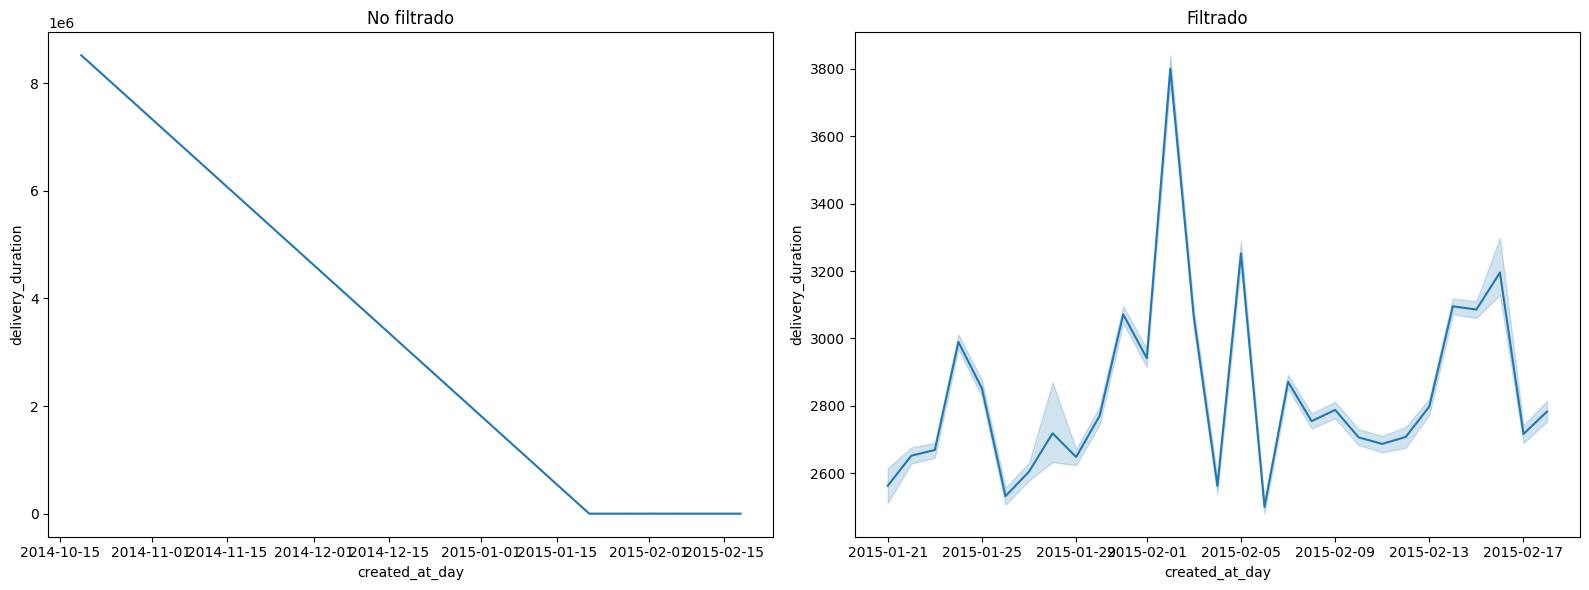

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos subgráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Dos gráficos horizontales, compartiendo el eje Y

# Primer gráfico
sns.lineplot(
    x='created_at_day', 
    y='delivery_duration', 
    data=df, 
    ax=axes[0]
)
axes[0].set_title("No filtrado")

# Segundo gráfico
sns.lineplot(
    x='created_at_day', 
    y='delivery_duration', 
    data=df[df['delivery_duration'] < 1000000], 
    ax=axes[1]
)
axes[1].set_title("Filtrado")

# Mostrar el resultado
plt.tight_layout()  # Ajustar los espacios entre subgráficos
plt.show()
